In [26]:
import numpy as np
import matplotlib.pyplot as plt

def Chebyshev_2nd_Polynomials(n, x):
    if n == 0:
        return 1
    elif n == 1:
        return 2 * x
    else:
        return 2 * x * Chebyshev_2nd_Polynomials(n-1, x) - Chebyshev_2nd_Polynomials(n-2, x)

def Chebyshev_2nd_Polynomials_Iterative(n, x):
    if n == 0:
        return 1
    elif n == 1:
        return 2 * x
    else:
        P_0 = 1
        P_1 = 2 * x
        P_i = 0
        for i in range(2, n+1):
            P_i = 2 * x * P_1 - P_0
            P_0, P_1 = P_1, P_i
        
        return P_i


def Chebyshev_2nd_roots(n):
    roots = []
    for i in range(1, n+1):
        x = np.cos(np.pi * (i) / (n + 1))
        roots.append(x)
    return roots

def Chebyshev_2nd_weights(n):
    weights = []
    for i in range(1, n+1):
        weight = (np.pi / (n + 1)) * np.sin(np.pi * i / (n + 1))**2
        weights.append(weight)
    return weights

def Gauss_Chebyshev_2nd_method(a, b, n, func):
    roots = Chebyshev_2nd_roots(n)
    weights = Chebyshev_2nd_weights(n)

    h = (b - a) / 2
    mid = (a + b) / 2
    integral_value = 0

    for i in range(n):
        t = roots[i]
        x = h * t + mid
        integral_value += weights[i] * func(x)

    integral_value *= h**2

    return integral_value


def func2(x):
    return np.exp(x)
a = -1
b = 1
# Wywołanie metody Gaussa-Czebyszewa II rodzaju
res = Gauss_Chebyshev_2nd_method(a, b, 20, func2)
from scipy.integrate import quad
def integrant(x):
    return func2(x) *np.sqrt(1 - x**2) # funkcja z wagą
print(res)
result, _ = quad(integrant, a, b) 
print(f'Wartość całki z wagą sqrt((x-a)(b-x)) (metoda scipy): {result}')

# Wykres wielomianów Czebyszewa II rodzaju

1.775499689212181
Wartość całki z wagą sqrt((x-a)(b-x)) (metoda scipy): 1.7754996892121147


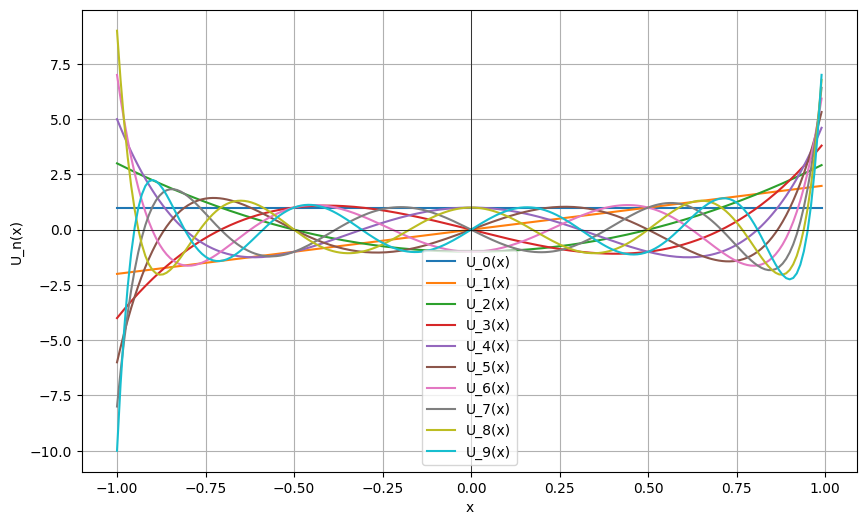

In [27]:
X = np.arange(-1, 1, 0.01)

plt.figure(figsize=(10, 6))

for i in range(10):
    Y = [Chebyshev_2nd_Polynomials_Iterative(i, x) for x in X]
    plt.plot(X, Y, label=f'U_{i}(x)')

plt.xlabel('x')
plt.ylabel('U_n(x)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()


In [28]:
# 1. f(x) = 1, waga: sqrt((x+1)(1-x)), przedział [-1,1]
def f1(x):
    return 1

chebyshev_result1 = Gauss_Chebyshev_2nd_method(-1, 1, 20, f1)

def integrant1(x):
    return f1(x) * np.sqrt((1 - x) * (x + 1))

result1, _ = quad(integrant1, -1, 1)
print(f'Całka 1: {chebyshev_result1}  (oczekiwane: ≈ {result1})')

# 2. f(x) = e^x, waga: sqrt(1 - x^2), przedział [-1,1]
def f2(x):
    return np.exp(x)

chebyshev_result2 =Gauss_Chebyshev_2nd_method(-1, 1, 20, f2)

def integrant2(x):
    return f2(x) * np.sqrt(1 - x**2)

result2, _ = quad(integrant2, -1, 1)
print(f'Całka 1: {chebyshev_result2}  (oczekiwane:≈ {result2})')

# 3. f(x) = ln(x), waga: sqrt(x*(1 - x)), przedział [0,1]
def f3(x):
    return np.log(x)

chebyshev_result3 =Gauss_Chebyshev_2nd_method(0, 1, 120, f3)

def integrant3(x):
    return f3(x) * np.sqrt(x * (1 - x))

result3, _ = quad(integrant3, 0, 1)
print(f'Całka 1: {chebyshev_result3}  (oczekiwane ≈ {result3})')

Całka 1: 1.5707963267948966  (oczekiwane: ≈ 1.5707963267948983)
Całka 1: 1.775499689212181  (oczekiwane:≈ 1.7754996892121147)
Całka 1: -0.3480467152528149  (oczekiwane ≈ -0.3480469817259902)


In [29]:
def f1(x): return 1
def f2(x): return np.exp(x)
def f3(x): return np.log(x)

def integrant1(x): return f1(x) * np.sqrt((1 - x) * (x + 1))
def integrant2(x): return f2(x) * np.sqrt(1 - x**2)
def integrant3(x): return f3(x) * np.sqrt(x * (1 - x))

# Dokładne całki (referencyjne)
ref1, _ = quad(integrant1, -1, 1)
ref2, _ = quad(integrant2, -1, 1)
ref3, _ = quad(integrant3, 0, 1)

n_values = [3, 5, 7, 9, 11, 17, 23, 30]
print("---|------------------------")
print(f"dokładna wartość{ref1:.16f}")
print("f(x) = 1, waga sqrt((1-x)(1+x)) na [-1,1]")
print("n  |  Przybliżona wartość")
print("---|------------------------")
for n in n_values:
    val = Gauss_Chebyshev_2nd_method(-1, 1, n, f1)
    print(f"{n:<3}|  {val:.16f}")

print("")
print("---|------------------------")
print(f"dokładna wartość{ref2:.16f}")
print("\nf(x) = e^x, waga sqrt(1 - x^2) na [-1,1]")
print("n  |  Przybliżona wartość")
print("---|------------------------")
for n in n_values:
    val = Gauss_Chebyshev_2nd_method(-1, 1, n, f2)
    print(f"{n:<3}|  {val:.16f}")

print("")
print("---|------------------------")
print(f"dokładna wartość{ref3:.16f}")
print("\nf(x) = ln(x), waga sqrt(x(1 - x)) na [0,1]")
print("n  |  Przybliżona wartość")
print("---|------------------------")
for n in n_values:
    val = Gauss_Chebyshev_2nd_method(0, 1, n, f3)
    print(f"{n:<3}|  {val:.16f}")

---|------------------------
dokładna wartość1.5707963267948983
f(x) = 1, waga sqrt((1-x)(1+x)) na [-1,1]
n  |  Przybliżona wartość
---|------------------------
3  |  1.5707963267948966
5  |  1.5707963267948961
7  |  1.5707963267948966
9  |  1.5707963267948968
11 |  1.5707963267948966
17 |  1.5707963267948966
23 |  1.5707963267948966
30 |  1.5707963267948961

---|------------------------
dokładna wartość1.7754996892121147

f(x) = e^x, waga sqrt(1 - x^2) na [-1,1]
n  |  Przybliżona wartość
---|------------------------
3  |  1.7754646765951378
5  |  1.7754996887813799
7  |  1.7754996892121799
9  |  1.7754996892121810
11 |  1.7754996892121802
17 |  1.7754996892121808
23 |  1.7754996892121808
30 |  1.7754996892121813

---|------------------------
dokładna wartość-0.3480469817259902

f(x) = ln(x), waga sqrt(x(1 - x)) na [0,1]
n  |  Przybliżona wartość
---|------------------------
3  |  -0.3402478266099379
5  |  -0.3458077595875253
7  |  -0.3471123970582916
9  |  -0.3475708230835058
11 |  -0